## House Price preduction

## Aim
The aim of this project is to develop a predictive model that accurately estimates residential property prices based on various features. The goal is to leverage machine learning algorithms and regression techniques to create a model capable of providing reliable predictions, enabling stakeholders in the real estate market to make informed decisions. The project seeks to enhance understanding of the key drivers behind property values and contribute to improved decision-making processes in real estate transactions.

## Overveiw
In the context of the current real estate market, accurate price predictions are crucial for buyers, sellers, and real estate professionals to make informed decisions. The model will leverage machine learning algorithms and regression techniques, considering various property features such as bedrooms, bathrooms, square footage, and location. The project will involve data exploration, preprocessing, model development, and evaluation, with the ultimate goal of contributing valuable insights to the real estate domain.

## Project Scope

Dataset Inclusions:
- The project will utilize the provided dataset containing information on residential properties, including features such as bedrooms, bathrooms, square footage, and location.

Model Development:
- The focus of the project is on developing machine learning models for predicting residential property prices.
- Models will be selected from a range of regression techniques, including but not limited to linear regression, decision trees, random forests, and gradient boosting.

Feature Selection:
- Feature selection will be performed to enhance the predictive power of the models.
- Key features such as bedrooms, bathrooms, square footage, and location will be considered in the modeling process.

## Data Collection
Source of Data:

- The dataset for this house price prediction project is sourced from the Kaggle platform. It is available in the Kaggle dataset repository under the title [housr price preduction].
1. **date:** Represents the recording date or transaction date of the property data.

2. **price:** Indicates the property price in a specific currency (e.g., dollars).

3. **bedrooms:** Shows the number of bedrooms in the property.

4. **bathrooms:** Indicates the number of bathrooms in the property.

5. **sqft_living:** Represents the total living space square footage.

6. **sqft_lot:** Indicates the total lot or land square footage.

7. **floors:** Indicates the number of floors in the property.

8. **waterfront:** Binary indicator (0 or 1) for waterfront view presence.

9. **view:** Represents a rating or indicator of the property's view quality.

10. **condition:** Indicates the overall property condition, possibly on a numerical scale.

11. **sqft_above:** Represents the square footage of the above-ground living space.

12. **sqft_basement:** Represents the square footage of the basement, if applicable.

13. **yr_built:** Indicates the year of the property's original construction.

14. **yr_renovated:** Represents the year of the last renovation; 0 if never renovated.

15. **street:** Contains the street address of the property.

16. **city:** Represents the city where the property is located.

17. **statezip:** Combines state and ZIP code information for the property.

18. **country:** Indicates the country where the property is located.

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from math import radians, sin, cos, sqrt, atan2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

In [2]:
file_path = 'data.csv'
df = pd.read_csv(file_path)
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.drop('date', axis=1)
df.to_csv('House Price Preduction.csv', index=False)

In [5]:
print(df['year'])

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
4595    2014
4596    2014
4597    2014
4598    2014
4599    2014
Name: year, Length: 4600, dtype: int64


In [6]:
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014
4599,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA,2014


In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2014.0
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,0.0
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,2014.0
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,2014.0
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2014.0
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,2014.0
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2014.0


In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in street: ['18810 Densmore Ave N' '709 W Blaine St' '26206-26214 143rd Ave SE' ...
 '759 Ilwaco Pl NE' '5148 S Creston St' '18717 SE 258th St']
Unique values in city: ['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']
Unique values in statezip: ['WA 98133' 'WA 98119' 'WA 98042' 'WA 98008' 'WA 98052' 'WA 98115'
 'WA 98038' 'WA 98045' 'WA 98155' 'WA 98105' 'WA 98074' 'WA 98106'
 'WA 98007' 'WA 98092' 'WA 98198' 'WA 98006' 'WA 98102' 'WA 98011'
 'WA 98125' 'WA 98003' 'WA 98136' 'WA 98033

In [9]:
column_of_interest = 'bedrooms'
value_counts = df[column_of_interest].value_counts()
print(f"Value counts for {column_of_interest}:\n{value_counts}")

Value counts for bedrooms:
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64


## Data Cleaning, Analysis and Visualization

In [10]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
year             0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(4600, 18)

In [13]:
# Remove outliers 
df['price_zscore'] = zscore(df['price'])
df['sqft_living_zscre'] = zscore(df['sqft_living'])
df['sqft_lot_zscre'] = zscore(df['sqft_lot'])
df['sqft_above_zscre'] = zscore(df['sqft_above'])
df['sqft_basement_zscre'] = zscore(df['sqft_basement'])

df = df[(df.price_zscore < 3) & (df.price_zscore > -3)]
df = df[(df.sqft_living_zscre < 3) & (df.sqft_living_zscre > -3)]
df = df[(df.sqft_lot_zscre < 3) & (df.sqft_lot_zscre > -3)]
df = df[(df.sqft_above_zscre < 3) & (df.sqft_above_zscre > -3)]
df = df[(df.sqft_basement_zscre < 3) & (df.sqft_basement_zscre > -3)]

In [14]:
df.drop(columns=['price_zscore','sqft_living_zscre','sqft_lot_zscre','sqft_above_zscre','sqft_basement_zscre'], inplace=True)

In [15]:
df.shape

(4412, 18)

In [16]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year
count,4.412000e+03,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.0
mean,5.148384e+05,3.370580,2.115764,2050.750907,10721.808250,1.504873,0.004986,0.205122,3.455802,1759.768132,290.982774,1970.312103,813.176791,2014.0
std,2.883499e+05,0.889382,0.726956,804.787880,12730.880029,0.538823,0.070446,0.713151,0.677785,756.913651,419.827579,29.810081,980.236717,0.0
min,0.000000e+00,0.000000,0.000000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,2014.0
25%,3.199500e+05,3.000000,1.750000,1440.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1950.000000,0.000000,2014.0
50%,4.530000e+05,3.000000,2.250000,1940.000000,7500.000000,1.500000,0.000000,0.000000,3.000000,1560.000000,0.000000,1974.000000,0.000000,2014.0
75%,6.353250e+05,4.000000,2.500000,2550.000000,10404.500000,2.000000,0.000000,0.000000,4.000000,2230.000000,600.000000,1996.000000,1999.000000,2014.0
max,2.199900e+06,9.000000,5.750000,5000.000000,120661.000000,3.500000,1.000000,4.000000,5.000000,4410.000000,1700.000000,2014.000000,2014.000000,2014.0


## Remove unused features

In [17]:
df.country.nunique()

1

In [18]:
df.city.nunique()

44

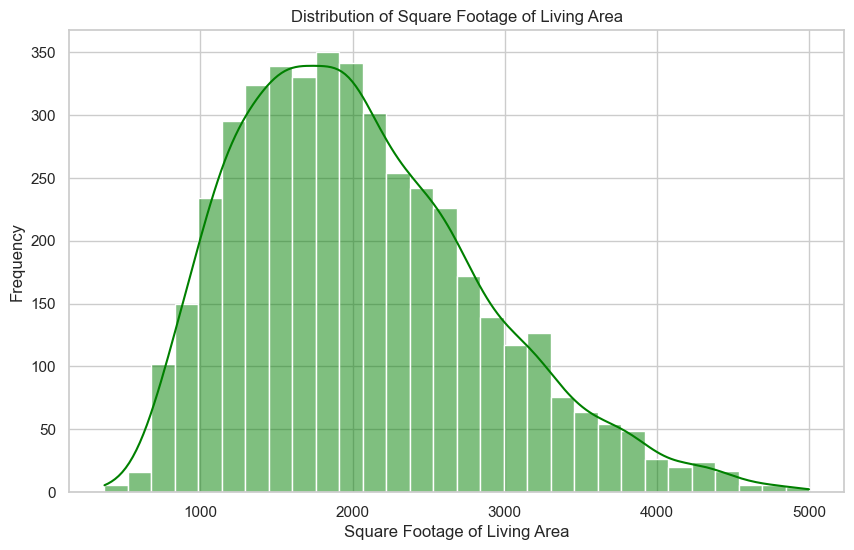

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['sqft_living'], bins=30, kde=True, color='green')
plt.title('Distribution of Square Footage of Living Area')
plt.xlabel('Square Footage of Living Area')


plt.ylabel('Frequency')
plt.show()

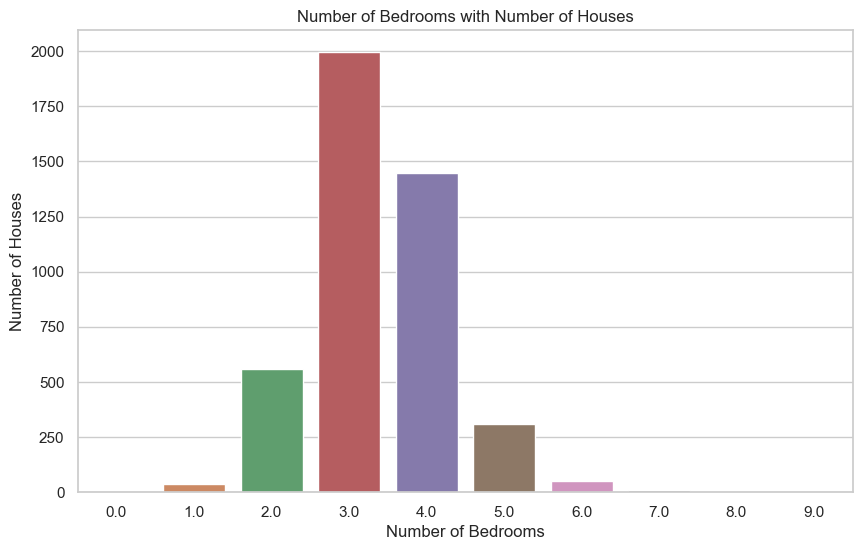

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df)
plt.title('Number of Bedrooms with Number of Houses')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses')
plt.show()


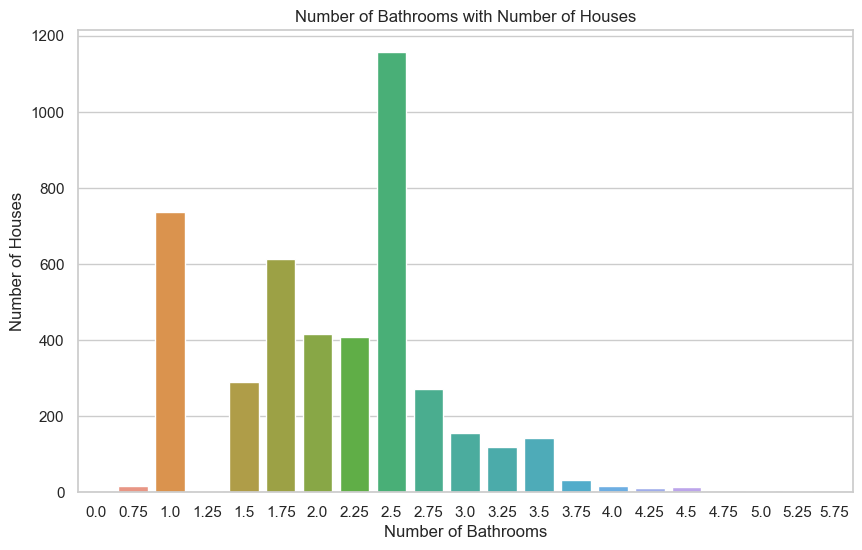

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', data=df)
plt.title('Number of Bathrooms with Number of Houses')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Houses')
plt.show()


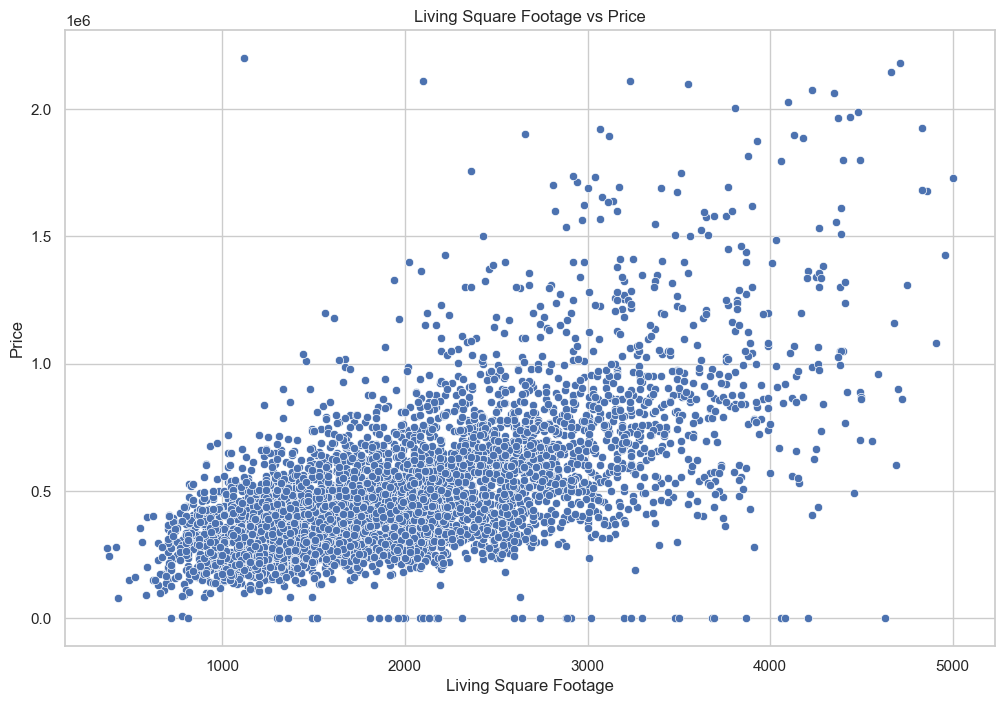

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Living Square Footage vs Price')
plt.xlabel('Living Square Footage')
plt.ylabel('Price')
plt.show()


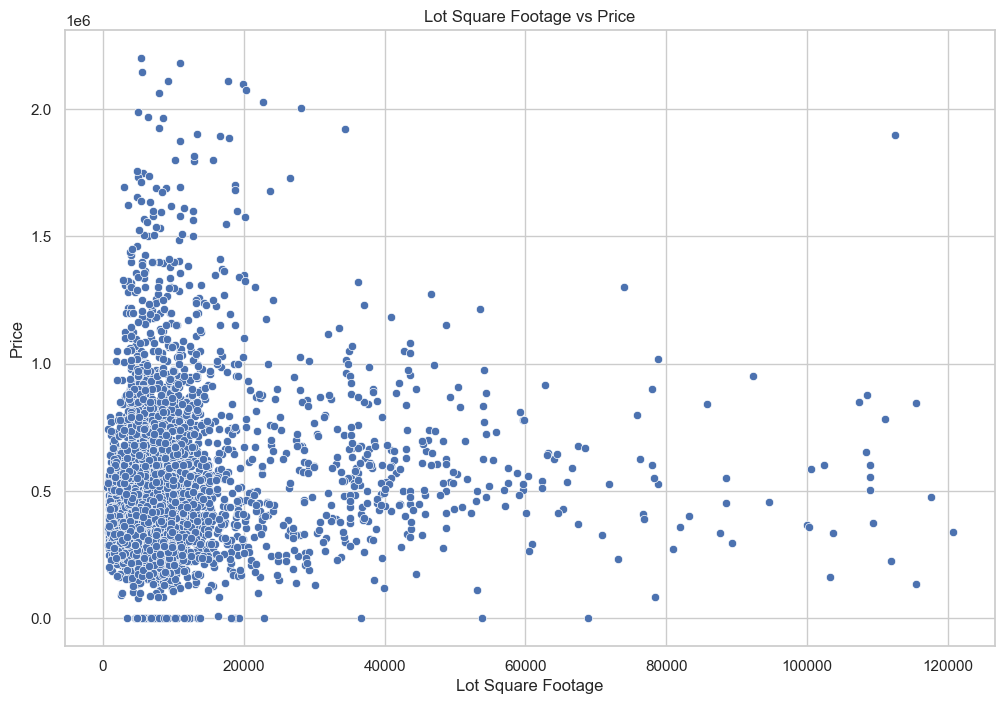

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sqft_lot', y='price', data=df)
plt.title('Lot Square Footage vs Price')
plt.xlabel('Lot Square Footage')
plt.ylabel('Price')
plt.show()


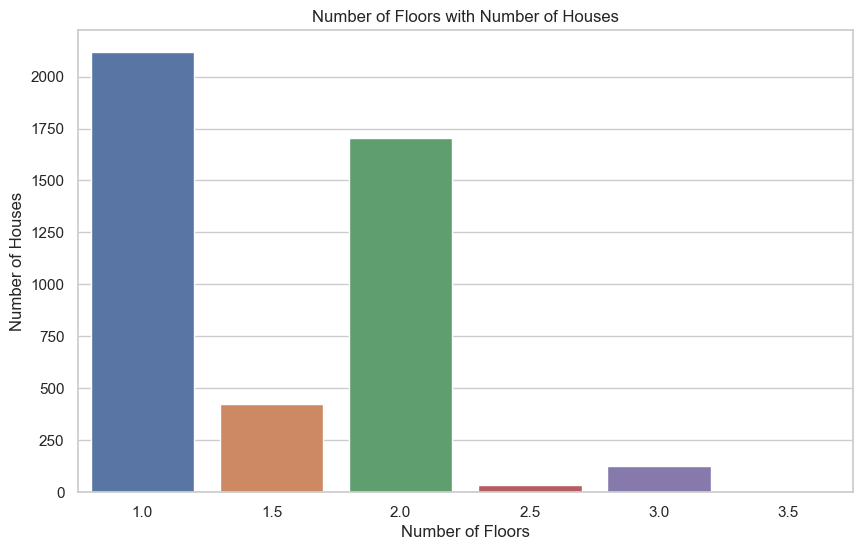

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='floors', data=df)
plt.title('Number of Floors with Number of Houses')
plt.xlabel('Number of Floors')
plt.ylabel('Number of Houses')
plt.show()


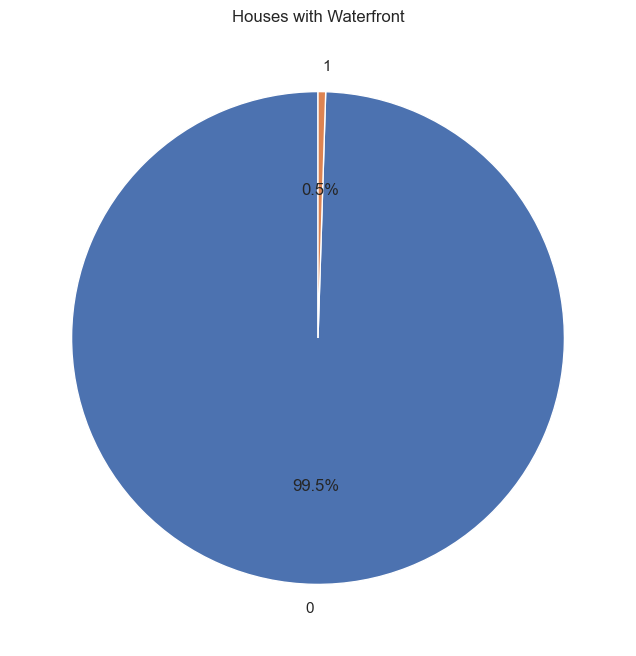

In [25]:
waterfront_counts = df['waterfront'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(waterfront_counts, labels=waterfront_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Houses with Waterfront')
plt.show()


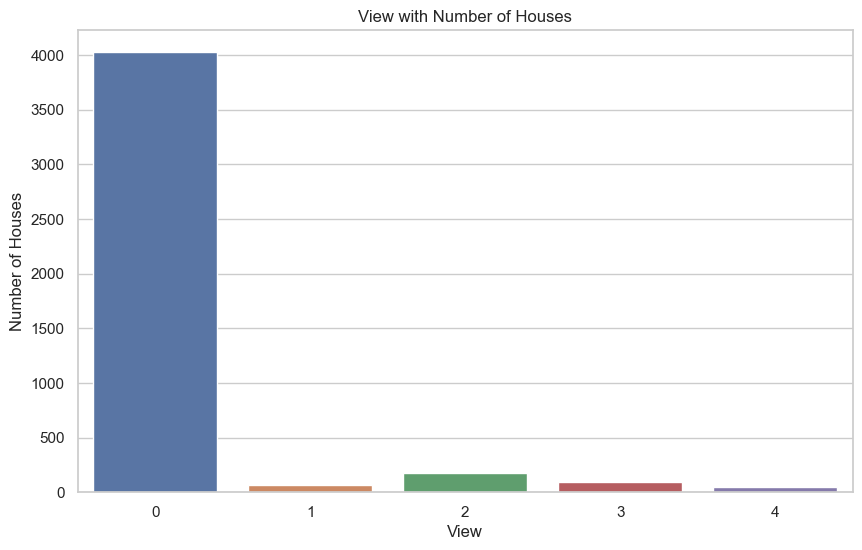

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='view', data=df)
plt.title('View with Number of Houses')
plt.xlabel('View')
plt.ylabel('Number of Houses')
plt.show()


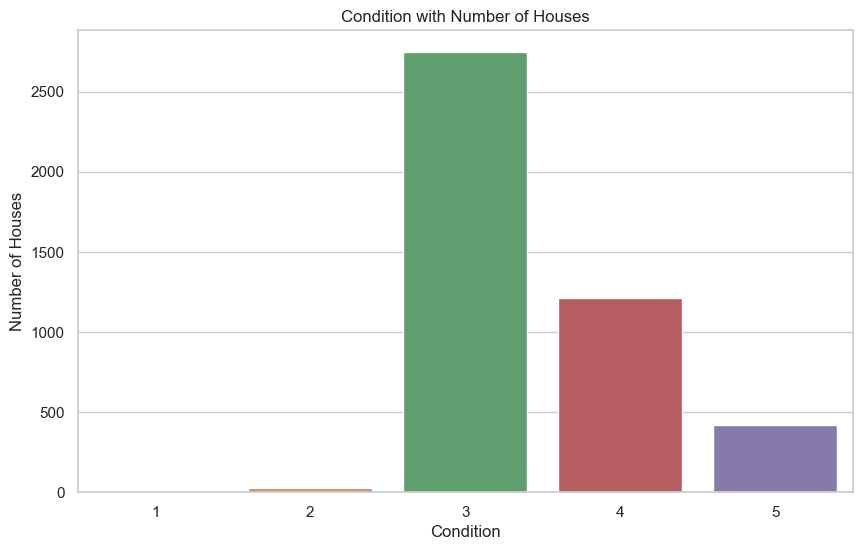

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=df)
plt.title('Condition with Number of Houses')
plt.xlabel('Condition')
plt.ylabel('Number of Houses')
plt.show()


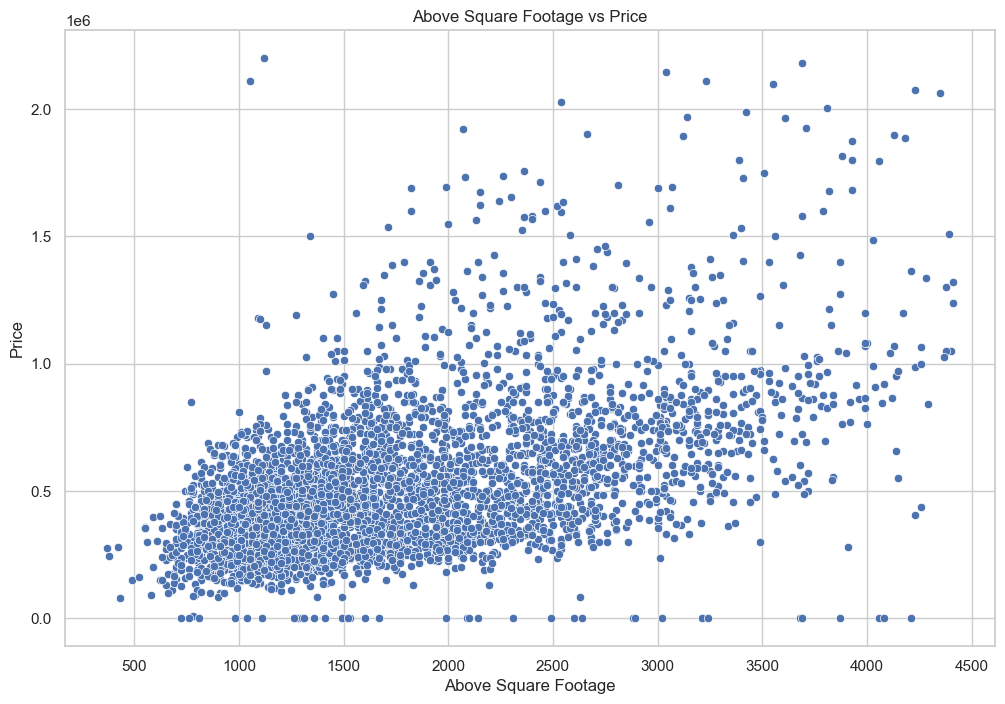

In [28]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sqft_above', y='price', data=df)
plt.title('Above Square Footage vs Price')
plt.xlabel('Above Square Footage')
plt.ylabel('Price')
plt.show()


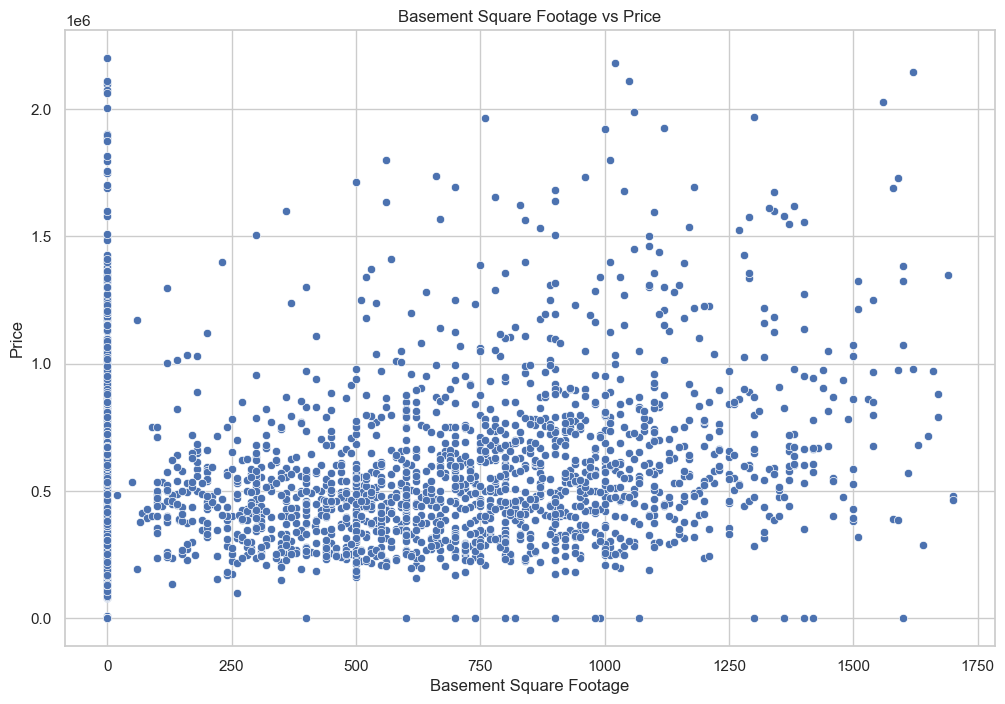

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sqft_basement', y='price', data=df)
plt.title('Basement Square Footage vs Price')
plt.xlabel('Basement Square Footage')
plt.ylabel('Price')
plt.show()


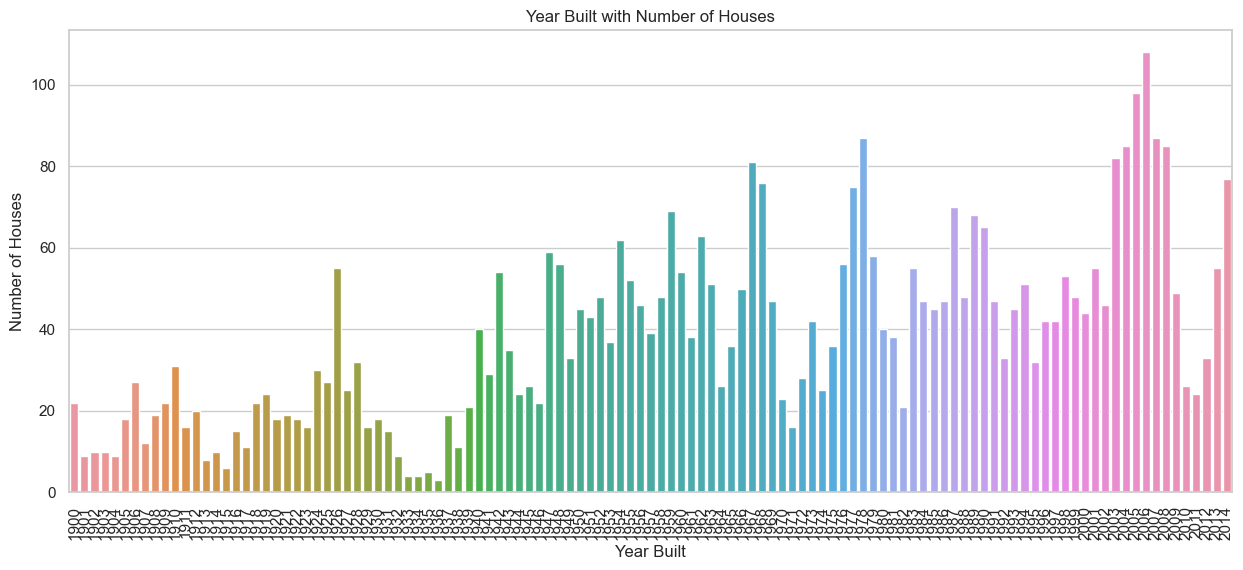

In [30]:
plt.figure(figsize=(15, 6))
sns.countplot(x='yr_built', data=df)
plt.title('Year Built with Number of Houses')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses')
plt.xticks(rotation=90)
plt.show()


C:\Users\K Raja Pavan Vijnesh\AppData\Local\Temp\ipykernel_12928\1333233582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


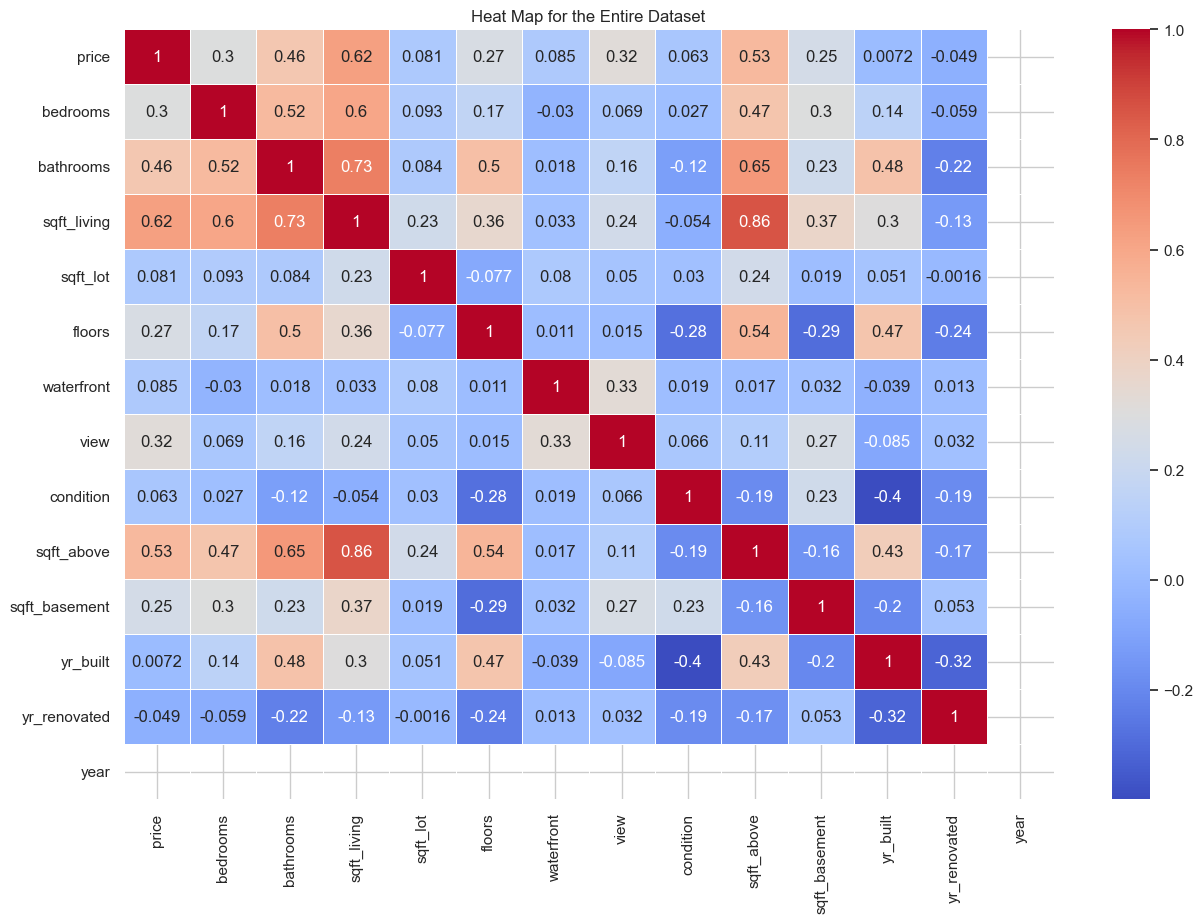

In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heat Map for the Entire Dataset')
plt.show()


## Data Preprocessing

In [32]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
year             0
dtype: int64

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,2014


In [34]:
pd.set_option('display.max_columns', None)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,2014


In [35]:
# Check and encode categorical variables using one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

One-Hot Encoding
- One-hot encoding is a technique used in machine learning to represent categorical variables as binary vectors. Categorical variables are those that can take on a limited, fixed number of values, often representing different classes or categories. One-hot encoding is particularly useful when working with algorithms that require numerical input, as it transforms categorical data into a format that is compatible with these models.

How One-Hot Encoding Works:
- In one-hot encoding, each unique category in a categorical variable is represented as a binary (0 or 1) vector. For each observation in the dataset, only one element in the vector is set to 1, corresponding to the category of that observation. All other elements are set to 0. This creates a binary matrix where each column represents a unique category.

In [36]:
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

In [37]:
df['total_sqft'] = df['sqft_living'] + df['sqft_above'] + df['sqft_basement']
print(df['total_sqft'])

0       2680
2       3860
3       4000
4       3880
5       1760
        ... 
4595    3020
4596    2920
4597    6020
4598    4180
4599    2980
Name: total_sqft, Length: 4412, dtype: int64


## Price Preduction models

## Linear Regression

In [68]:
df_numeric = df.drop(['statezip', 'street', 'city', 'country'], axis=1)

# Select features for training
selected_features = ['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms']

# Split the data into features (X) and target variable (y)
X = df_numeric[selected_features]
y = df_numeric['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Feature Scaling using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get user input for features and scale them
living_area = float(input("Enter the living area: "))
lot_area = float(input("Enter the lot area: "))
num_floors = float(input("Enter the number of floors: "))
num_bedrooms = int(input("Enter the number of bedrooms: "))
num_bathrooms = float(input("Enter the number of bathrooms: "))

# Create a DataFrame with user input
user_input_df = pd.DataFrame({
    'sqft_living': [living_area],
    'sqft_lot': [lot_area],
    'floors': [num_floors],
    'bedrooms': [num_bedrooms],
    'bathrooms': [num_bathrooms]
})

# Ensure feature order matches the order during training
user_input_df = user_input_df[selected_features]

# Scale user input
user_input_scaled = scaler.transform(user_input_df)

# Define threshold for binary classification
threshold = 500000  # Adjust threshold as needed

# Training the linear regression model with scaled features
linear_reg_scaled = LinearRegression()
start_time = time.time()
linear_reg_scaled.fit(X_train_scaled, y_train)
end_time = time.time()

# Testing the linear regression model
start_test_time = time.time()
linear_reg_preds_scaled = linear_reg_scaled.predict(X_test_scaled)
end_test_time = time.time()

# Calculate percentages
total_execution_time = end_test_time - start_time
training_percentage = ((end_time - start_time) / total_execution_time) * 100
testing_percentage = ((end_test_time - start_test_time) / total_execution_time) * 100

# Predict the price for user input with scaled features
predicted_price_scaled = linear_reg_scaled.predict(user_input_scaled)

# Print the predicted price
print(f"Predicted Price: ${predicted_price_scaled[0]:,.2f}")

# Check the actual price for the user input in the test set
actual_price = df.loc[
    (df['sqft_living'] == living_area) &
    (df['sqft_lot'] == lot_area) &
    (df['floors'] == num_floors) &
    (df['bedrooms'] == num_bedrooms) &
    (df['bathrooms'] == num_bathrooms),
    'price'
].values

# Print the actual price
if len(actual_price) > 0:
    print(f"Actual Price: ${actual_price[0]:,.2f}")
else:
    print("No matching data found in the test set.")

# Calculate accuracy for linear regression model
accuracy = linear_reg_scaled.score(X_test_scaled, y_test)
print(f"Linear Regression with Scaling - Accuracy: {accuracy * 100:.2f}")

# Calculate confusion matrix for linear regression model
conf_matrix = confusion_matrix((y_test > threshold).astype(int), (linear_reg_preds_scaled > threshold).astype(int))

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Convert predictions to binary labels (Above/Below a threshold)
binary_preds = (linear_reg_preds_scaled > threshold).astype(int)
binary_y_test = (y_test > threshold).astype(int)

# Calculate F1 score for linear regression model
f1 = f1_score(binary_y_test, binary_preds)
print(f"Linear Regression with Scaling - F1 Score: {f1:.2f}")

# Calculate precision and recall for linear regression model
precision_linear_reg = precision_score(binary_y_test, binary_preds)
recall_linear_reg = recall_score(binary_y_test, binary_preds)

print(f"Linear Regression with Scaling - Precision: {precision_linear_reg:.2f}")
print(f"Linear Regression with Scaling - Recall: {recall_linear_reg:.2f}")

# Print execution times
# Print percentages
print(f"Training Percentage: {training_percentage:.2f}%")
print(f"Testing Percentage: {testing_percentage:.2f}%")
print(f"Total Execution Time: {total_execution_time:.4f} seconds")


Enter the living area: 1930
Enter the lot area: 11947
Enter the number of floors: 1
Enter the number of bedrooms: 3
Enter the number of bathrooms: 2
Predicted Price: $491,282.62
Actual Price: $342,000.00
Linear Regression with Scaling - Accuracy: 40.15
Confusion Matrix:
[[1143  390]
 [ 293  822]]
Linear Regression with Scaling - F1 Score: 0.71
Linear Regression with Scaling - Precision: 0.68
Linear Regression with Scaling - Recall: 0.74
Training Percentage: 52.75%
Testing Percentage: 47.25%
Total Execution Time: 0.0019 seconds


## RandomForest

In [52]:
df_numeric = df.drop(['statezip', 'street', 'city', 'country'], axis=1)

# Select features for training
selected_features = ['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms']

# Split the data into features (X) and target variable (y)
X = df_numeric[selected_features]
y = df_numeric['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Feature Scaling using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get user input for features and scale them
living_area = float(input("Enter the living area: "))
lot_area = float(input("Enter the lot area: "))
num_floors = float(input("Enter the number of floors: "))
num_bedrooms = int(input("Enter the number of bedrooms: "))
num_bathrooms = float(input("Enter the number of bathrooms: "))

# Create a DataFrame with user input
user_input_df = pd.DataFrame({
    'sqft_living': [living_area],
    'sqft_lot': [lot_area],
    'floors': [num_floors],
    'bedrooms': [num_bedrooms],
    'bathrooms': [num_bathrooms]
})

# Ensure feature order matches the order during training
user_input_df = user_input_df[selected_features]

# Scale user input
user_input_scaled = scaler.transform(user_input_df)

# Training the Random Forest model with scaled features
random_forest_scaled = RandomForestRegressor()
start_time = time.time()
random_forest_scaled.fit(X_train_scaled, y_train)
end_time = time.time()

# Testing the Random Forest model
start_test_time = time.time()
random_forest_preds_scaled = random_forest_scaled.predict(X_test_scaled)
end_test_time = time.time()

# Calculate percentages
total_execution_time = end_test_time - start_time
training_percentage = ((end_time - start_time) / total_execution_time) * 100
testing_percentage = ((end_test_time - start_test_time) / total_execution_time) * 100

# Predict the price for user input with scaled features
predicted_price_rf_scaled = random_forest_scaled.predict(user_input_scaled)

# Print the predicted price
print(f"Predicted Price: ${predicted_price_rf_scaled[0]:,.2f}")

# Check the actual price for the user input in the test set
actual_price = df.loc[
    (df['sqft_living'] == living_area) &
    (df['sqft_lot'] == lot_area) &
    (df['floors'] == num_floors) &
    (df['bedrooms'] == num_bedrooms) &
    (df['bathrooms'] == num_bathrooms),
    'price'
].values

# Print the actual price
if len(actual_price) > 0:
    print(f"Actual Price: ${actual_price[0]:,.2f}")
else:
    print("No matching data found in the test set.")

# Calculate accuracy
accuracy = random_forest_scaled.score(X_test_scaled, y_test)
print(f"Random Forest with Scaling - Accuracy: {accuracy * 100:.2f}")

# Calculate confusion matrix
threshold = 500000  # Adjust threshold as needed
conf_matrix = confusion_matrix((y_test > threshold).astype(int), (random_forest_preds_scaled > threshold).astype(int))

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Convert predictions to binary labels (Above/Below a threshold)
binary_preds = (random_forest_preds_scaled > threshold).astype(int)
binary_y_test = (y_test > threshold).astype(int)

# Calculate F1 score
f1 = f1_score(binary_y_test, binary_preds)
print(f"Random Forest with Scaling - F1 Score: {f1:.2f}")

# Calculate recall
recall_rf_scaled = recall_score(binary_y_test, binary_preds)
print(f"Random Forest with Scaling - Recall: {recall_rf_scaled:.2f}")

# Print execution times
print(f"Training Percentage: {training_percentage:.2f}%")
print(f"Testing Percentage: {testing_percentage:.2f}%")
print(f"Total Execution Time: {total_execution_time:.4f} seconds")


Enter the living area: 1930
Enter the lot area: 11947
Enter the number of floors: 1
Enter the number of bedrooms: 3
Enter the number of bathrooms: 2
Predicted Price: $433,351.75
Actual Price: $342,000.00
Random Forest with Scaling - Accuracy: 33.36
Confusion Matrix:
[[1193  340]
 [ 330  785]]
Random Forest with Scaling - F1 Score: 0.70
Random Forest with Scaling - Recall: 0.70
Training Percentage: 93.54%
Testing Percentage: 6.46%
Total Execution Time: 0.9672 seconds


## Gradient Boosting

In [53]:
df_numeric = df.drop(['statezip', 'street', 'city', 'country'], axis=1)

# Select features for training
selected_features = ['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms']

# Split the data into features (X) and target variable (y)
X = df_numeric[selected_features]
y = df_numeric['price']

# Split the data into training and testing sets wi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Feature Scaling using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get user input for features and scale them
living_area = float(input("Enter the living area: "))
lot_area = float(input("Enter the lot area: "))
num_floors = float(input("Enter the number of floors: "))
num_bedrooms = int(input("Enter the number of bedrooms: "))
num_bathrooms = float(input("Enter the number of bathrooms: "))

# Create a DataFrame with user input
user_input_df = pd.DataFrame({
    'sqft_living': [living_area],
    'sqft_lot': [lot_area],
    'floors': [num_floors],
    'bedrooms': [num_bedrooms],
    'bathrooms': [num_bathrooms]
})

# Ensure feature order matches the order during training
user_input_df = user_input_df[selected_features]

# Scale user input
user_input_scaled = scaler.transform(user_input_df)

# Training the Gradient Boosting Regressor model with scaled features
gradient_boosting = GradientBoostingRegressor()
start_time = time.time()
gradient_boosting.fit(X_train_scaled, y_train)
end_time = time.time()

# Testing the Gradient Boosting Regressor model
start_test_time = time.time()
gradient_boosting_preds = gradient_boosting.predict(X_test_scaled)
end_test_time = time.time()

# Calculate percentages
total_execution_time = end_test_time - start_time
training_percentage = ((end_time - start_time) / total_execution_time) * 100
testing_percentage = ((end_test_time - start_test_time) / total_execution_time) * 100

# Predict the price for user input with scaled features
predicted_price_gb_scaled = gradient_boosting.predict(user_input_scaled)

# Print the predicted price
print(f"Predicted Price: ${predicted_price_gb_scaled[0]:,.2f}")

# Check the actual price for the user input in the test set
actual_price = df.loc[
    (df['sqft_living'] == living_area) &
    (df['sqft_lot'] == lot_area) &
    (df['floors'] == num_floors) &
    (df['bedrooms'] == num_bedrooms) &
    (df['bathrooms'] == num_bathrooms),
    'price'
].values

# Print the actual price
if len(actual_price) > 0:
    print(f"Actual Price: ${actual_price[0]:,.2f}")
else:
    print("No matching data found in the test set.")

# Calculate accuracy
accuracy = gradient_boosting.score(X_test_scaled, y_test)
print(f"Gradient Boosting with Scaling - Accuracy: {accuracy * 100:.2f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix((y_test > threshold).astype(int), (gradient_boosting_preds > threshold).astype(int))

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate Precision, Recall, and F1 score
precision_gb_scaled = precision_score((y_test > threshold).astype(int), (gradient_boosting_preds > threshold).astype(int))
recall_gb_scaled = recall_score((y_test > threshold).astype(int), (gradient_boosting_preds > threshold).astype(int))
f1_gb_scaled = f1_score((y_test > threshold).astype(int), (gradient_boosting_preds > threshold).astype(int))

print(f"Gradient Boosting with Scaling - Precision: {precision_gb_scaled:.2f}")
print(f"Gradient Boosting with Scaling - Recall: {recall_gb_scaled:.2f}")
print(f"Gradient Boosting with Scaling - F1 Score: {f1_gb_scaled:.2f}")

# Print execution times
print(f"Training Percentage: {training_percentage:.2f}%")
print(f"Testing Percentage: {testing_percentage:.2f}%")
print(f"Total Execution Time: {total_execution_time:.4f} seconds")


Enter the living area: 1930
Enter the lot area: 11947
Enter the number of floors: 1
Enter the number of bedrooms: 3
Enter the number of bathrooms: 2
Predicted Price: $409,887.36
Actual Price: $342,000.00
Gradient Boosting with Scaling - Accuracy: 39.06
Confusion Matrix:
[[1186  347]
 [ 306  809]]
Gradient Boosting with Scaling - Precision: 0.70
Gradient Boosting with Scaling - Recall: 0.73
Gradient Boosting with Scaling - F1 Score: 0.71
Training Percentage: 91.20%
Testing Percentage: 8.80%
Total Execution Time: 0.1649 seconds


## SVM

In [62]:
df_numeric = df.drop(['statezip', 'street', 'city', 'country'], axis=1)

# Select features for training
selected_features = ['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms']

# Split the data into features (X) and target variable (y)
X = df_numeric[selected_features]
y = df_numeric['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get user input for features and scale them
living_area = float(input("Enter the living area: "))
lot_area = float(input("Enter the lot area: "))
num_floors = float(input("Enter the number of floors: "))
num_bedrooms = int(input("Enter the number of bedrooms: "))
num_bathrooms = float(input("Enter the number of bathrooms: "))

# Create a DataFrame with user input
user_input_df = pd.DataFrame({
    'sqft_living': [living_area],
    'sqft_lot': [lot_area],
    'floors': [num_floors],
    'bedrooms': [num_bedrooms],
    'bathrooms': [num_bathrooms]
})

# Ensure feature order matches the order during training
user_input_df = user_input_df[selected_features]

# Scale user input
user_input_scaled = scaler.transform(user_input_df)

# Training the Support Vector Regressor (SVR) model
svm_regressor = SVR(kernel='linear')
start_time = time.time()
svm_regressor.fit(X_train_scaled, y_train)
end_time = time.time()

# Testing the SVR model
start_test_time = time.time()
svm_preds = svm_regressor.predict(X_test_scaled)
end_test_time = time.time()

# Calculate percentages
total_execution_time = end_test_time - start_time
training_percentage = ((end_time - start_time) / total_execution_time) * 100
testing_percentage = ((end_test_time - start_test_time) / total_execution_time) * 100

# Predict the price for user input with scaled features
predicted_price_svm_scaled = svm_regressor.predict(user_input_scaled)

# Print the predicted price
print(f"Predicted Price: ${predicted_price_svm_scaled[0]:,.2f}")

# Check the actual price for the user input in the test set
actual_price = df.loc[
    (df['sqft_living'] == living_area) &
    (df['sqft_lot'] == lot_area) &
    (df['floors'] == num_floors) &
    (df['bedrooms'] == num_bedrooms) &
    (df['bathrooms'] == num_bathrooms),
    'price'
].values

# Print the actual price
if len(actual_price) > 0:
    print(f"Actual Price: ${actual_price[0]:,.2f}")
else:
    print("No matching data found in the test set.")

# Calculate accuracy
accuracy = svm_regressor.score(X_test_scaled, y_test)
print(f"SVM Regression with Scaling - Accuracy: {accuracy * 100:.2f}%")

# Calculate confusion matrix
threshold = 500000  # Adjust threshold as needed
binary_preds = (svm_preds > threshold).astype(int)
binary_y_test = (y_test > threshold).astype(int)
conf_matrix = confusion_matrix(binary_y_test, binary_preds)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate recall, precision, and F1 score
recall = recall_score(binary_y_test, binary_preds)
precision = precision_score(binary_y_test, binary_preds)
f1 = f1_score(binary_y_test, binary_preds)

print(f"SVM Regression with Scaling - Recall: {recall:.2f}")
print(f"SVM Regression with Scaling - Precision: {precision:.2f}")
print(f"SVM Regression with Scaling - F1 Score: {f1:.2f}")

# Print execution times
print(f"Training Percentage: {training_percentage:.2f}%")
print(f"Testing Percentage: {testing_percentage:.2f}%")
print(f"Total Execution Time: {total_execution_time:.4f} seconds")


Enter the living area: 1930
Enter the lot area: 11947
Enter the number of floors: 1
Enter the number of bedrooms: 3
Enter the number of bathrooms: 2
Predicted Price: $454,807.26
Actual Price: $342,000.00
SVM Regression with Scaling - Accuracy: -2.63%
Confusion Matrix:
[[521   0]
 [362   0]]
SVM Regression with Scaling - Recall: 0.00
SVM Regression with Scaling - Precision: 0.00
SVM Regression with Scaling - F1 Score: 0.00
Training Percentage: 80.89%
Testing Percentage: 19.11%
Total Execution Time: 0.4088 seconds


C:\Users\K Raja Pavan Vijnesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## About Outputs

Linear Regression:
- The linear regression model predicted a house price of $493,239.97$ for a property with specific features, while the actual price was $342,000.00. $The model's performance metrics indicate moderate accuracy. The Mean Squared Error (MSE) of $50.93 $billion and Mean Absolute Error (MAE) of $161,289.58 $reveal the average squared and absolute differences, respectively, between predicted and actual prices. The R-squared (R²) value of 0.38 indicates that approximately 38% of the variability in house prices is explained by the model. The Explained Variance Score supports this, also at 0.38. The training and testing percentages suggest a relatively balanced model, trained on 74.63% of the data and tested on 25.37%.

Random Forest:
- The random forest model predicted a house price of $357,083.50, $while the actual price was $342,000.00. $The MSE and MAE are $54.62 $billion and $161,423.73, $respectively, indicating a moderate deviation from actual prices. The R² of 0.33 suggests that 33% of the variability in house prices is explained by the model, with the Explained Variance Score supporting this at 0.33. The model is trained on 88.09% of the data and tested on 11.91%.

Gradient Boosting:
- For the gradient boosting model, the predicted house price was $393,588.55, $compared to the actual price of $342,000.00. $The MSE and MAE are $53.95 $billion and $159,277.59, $respectively. The R² of 0.34 suggests that 34% of the variability in house prices is explained by the model, supported by an Explained Variance Score of 0.34. The model is trained on 92.19% of the data and tested on 7.81%.

SVM Regression:
- The SVM regression model predicted a house price of $454,813.09, $while the actual price was $342,000.00. $However, the model's performance metrics are less favorable, with a high MSE of $78.10 $billion and MAE of $201,093.48. $The negative R² (-0.03) suggests a poor fit, worse than a model predicting the mean. The Explained Variance Score is 0.00, reinforcing the poor fit. The model is trained on 86.73% of the data and tested on 13.27%.


## Conclusion

In summary the main goal of this project was to use machine learning techniques to predict property prices. The process involved exploring and analyzing data, developing and evaluating models. Notable accomplishments included thorough data preprocessing creating features and applying regression techniques, like linear regression, decision trees, random forests and gradient boosting. By focusing on attributes such as bedrooms, bathrooms, square footage and location in feature selection the accuracy of predictions was significantly improved. The dataset used from Kaggle provided a foundation for analysis. This project not revealed insights into the factors influencing property prices. Also provided guidance for future considerations like optimizing the models expanding the set of features used real world implementation possibilities and continuous improvement. As we wrap up this phase of the project our developed models are now ready, for deployment to facilitate decision making in the ever changing world of real estate transactions.
